'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


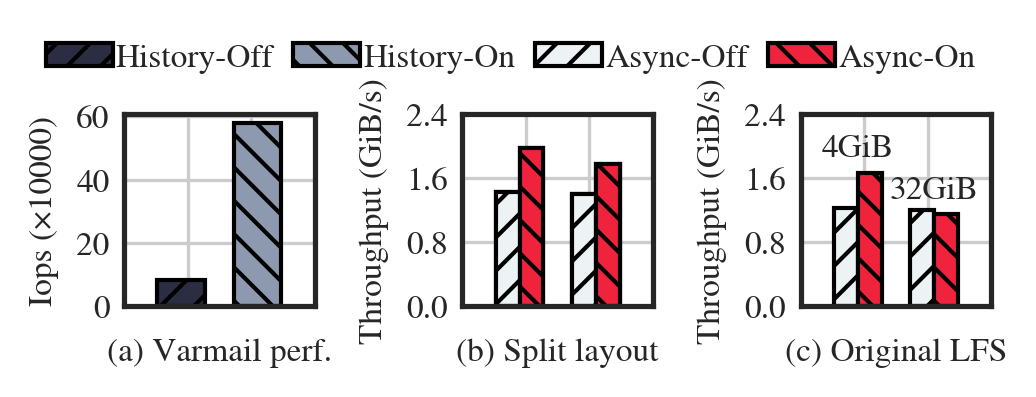

In [16]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.8
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
# Plotting Settings

bar_width = 0.75
subfig_titles = ["(a) 0% dup ratio", "(b) 25% dup ratio", "(c) 50% dup ratio", "(d) 75% dup ratio"]
patterns = ['///', '\\\\\\', 'XXX', '']
# Reference: https://designbro.com/blog/inspiration/color-combinations/
colors = ["#2b2d42", "#8d99ae", "#edf2f4", "#ef233c"]

fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(3)))

plt.subplot(1, 3, 1)
with open("./performance-comparison-table-workload", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

x = [0.9, 2.1]
for i in range(2):
    h = df.iloc[i]["iops"] / 10000
    plt.bar(x[i], h, width=bar_width, hatch=patterns[i], edgecolor='black', color=colors[i])
plt.xticks([0, 1, 2, 3], labels=[], fontsize=8)
plt.yticks([0, 20, 40, 60], fontsize=8)
plt.ylabel('Iops (×10000)', fontsize=8)
plt.xlabel("(a) Varmail perf.", fontsize=8) 


plt.subplot(1, 3, 2)
with open("./performance-comparison-table-lose-layout", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

bar_width = 0.375
fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
tot = len(fss) * bar_width
for i in range(2):
    for idx, fs in enumerate(fss):
        points = []
        for pivot in x:
            point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
            points.append(point)
        h = df[df['file_system'] == fs]["bandwidth(MiB/s)"] / 1024
        plt.bar(points, h, width=bar_width, hatch=patterns[idx], edgecolor='black', color=colors[idx+2])

plt.xticks([0, 1, 2, 3], labels=[], fontsize=8)
plt.yticks([0, 0.8, 1.6, 2.4], fontsize=8)
plt.ylabel('Throughput (GiB/s)', fontsize=8)
plt.xlabel("(b) Split layout", fontsize=8) 

plt.subplot(1, 3, 3)
with open("./performance-comparison-table-tight-layout", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

bar_width = 0.375
fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
tot = len(fss) * bar_width

for idx, fs in enumerate(fss):
    points = []
    for pivot in x:
        point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
        points.append(point)
    h = df[df['file_system'] == fs]["bandwidth(MiB/s)"] / 1024
    plt.bar(points, h, width=bar_width, hatch=patterns[idx], edgecolor='black', color=colors[idx+2])
    if idx == 1:
        max_h = h
for i in range(2):
    plt.text(x[i], max_h.iloc[i] + 0.3, ["4GiB", "32GiB"][i], fontsize=8, horizontalalignment='center', verticalalignment='center')

plt.xticks([0, 1, 2, 3], labels=[], fontsize=8)
plt.yticks([0, 0.8, 1.6, 2.4], fontsize=8)
plt.ylabel('Throughput (GiB/s)', fontsize=8)
plt.xlabel("(c) Original LFS", fontsize=8) 


fig.legend(["History-Off", "History-On", "Async-Off", "Async-On"], loc='center', bbox_to_anchor=(0.5, 1), ncol=4, fontsize=8,columnspacing=0.6,  labelspacing=0.1, handletextpad=0.1)

plt.tight_layout()
plt.savefig("./FIG-OptimizationsBreakdown.pdf", bbox_inches='tight', pad_inches=0)
